# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
import urllib
from pandas.io.json import json_normalize 


responses = []
# Import API key
api_key = "e7049c2afdfec90a654f7283a99e369a"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
%%capture cap --no-stderr
url = "http://api.openweathermap.org/data/2.5/weather?"
record = 1

# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}

summary = ["name", "id"]

cod = ["cod"]

print("Beginning Data Retrieval")
print("----------------------------------")

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city

    try:

        weather_json = owm.get_current(city,**settings)
        responses.append(weather_json)
        info = weather_json(*summary)      
        print(f"Processing record {record} | {info}")
        print(f"{query_url}")
        record = record+1

    except urllib.error.HTTPError:
        print("City not found. Skipping...")

print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")


In [4]:
with open(output_data_file, 'w') as f:
    f.write(cap.stdout)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities = json_normalize(responses)
cities.to_csv('Cities_weather.csv', sep=',', encoding='utf-8')
cities

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed
0,stations,20,200,51.89,-8.40,1544592600,2965139,NaN,93,1015.00,...,1563.0,0.0032,1544603530,1544631751,1.0,10000.0,"[{'id': 801, 'main': 'Clouds', 'description': ...",350.00000,NaN,1.00
1,stations,75,200,-53.16,-70.91,1544594400,3874787,NaN,75,1004.00,...,8487.0,0.0177,1544602270,1544663059,1.0,10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",330.00000,NaN,3.60
2,stations,5,200,21.05,-89.07,1544593500,3526662,NaN,63,1024.00,...,7140.0,0.0034,1544617439,1544656583,1.0,11265.0,"[{'id': 800, 'main': 'Clear', 'description': '...",60.00000,NaN,1.50
3,stations,68,200,-23.70,133.88,1544592600,2077895,NaN,12,1005.00,...,9483.0,0.0035,1544559053,1544607927,1.0,10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",170.00000,NaN,8.20
4,stations,80,200,-20.58,48.53,1544595204,1058080,1021.67,95,1021.67,...,NaN,0.0042,1544579925,1544628035,NaN,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...",45.50020,NaN,2.41
5,stations,90,200,-32.72,152.14,1544592600,2155562,NaN,73,1011.00,...,9605.0,0.0044,1544553418,1544604798,1.0,10000.0,"[{'id': 804, 'main': 'Clouds', 'description': ...",50.00000,NaN,6.20
6,stations,0,200,67.46,153.71,1544595205,2121025,1021.67,0,1021.67,...,NaN,0.0033,1544576356,1544581081,NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",129.50000,NaN,1.11
7,stations,20,200,-42.88,147.33,1544592600,2163355,NaN,44,1007.00,...,9545.0,0.0410,1544552738,1544607792,1.0,10000.0,"[{'id': 801, 'main': 'Clouds', 'description': ...",50.00000,NaN,8.70
8,stations,48,200,-34.42,19.24,1544595205,3366880,988.27,81,988.27,...,NaN,0.0069,1544585050,1544636978,NaN,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...",302.00000,NaN,2.36
9,stations,40,200,-3.98,-38.73,1544590800,3395473,NaN,78,1013.00,...,8363.0,0.0224,1544602694,1544647161,1.0,10000.0,"[{'id': 802, 'main': 'Clouds', 'description': ...",110.00000,NaN,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

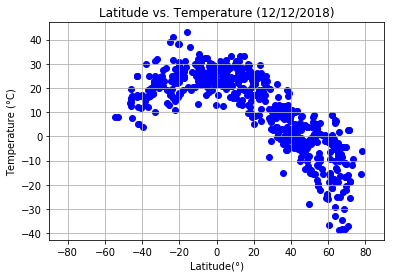

<Figure size 432x288 with 0 Axes>

In [6]:
x_axis = cities['coord.lat']
y_axis = cities['main.temp']

plt.title("Latitude vs. Temperature (12/12/2018)")
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (°C)")
plt.xlim(-90,90)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.grid()
plt.show()
plt.savefig("./Images/temperature.png")

#### Latitude vs. Temperature plot

Main trend observations between temperature and latitude. 
- Higher temperature values are observed around the equator (0° latitude)
- Temperature gradient is similar towards north and south
- There are many more samples north of equator

#### Latitude vs. Humidity Plot

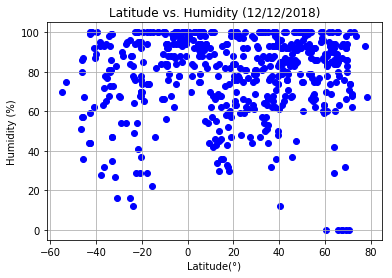

<Figure size 432x288 with 0 Axes>

In [7]:
x_axis = cities['coord.lat']
y_axis = cities['main.humidity']

plt.title("Latitude vs. Humidity (12/12/2018)")
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.grid()
plt.show()
plt.savefig("./Images/humidity.png")


### Latitude vs. Humidity plot

Main trend observations between humidity and latitude. 

- Highly humid places appear all over the latitude spectrum
- Many places with low humidity appear around cold climates (±60°)
- Points with near 0% humidity close to the north pole (>60°) are possibly outliers

#### Latitude vs. Cloudiness Plot

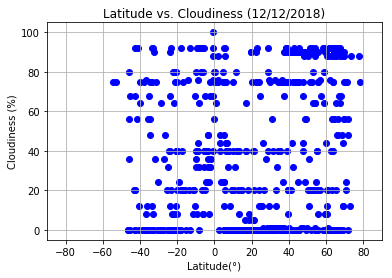

<Figure size 432x288 with 0 Axes>

In [8]:
x_axis = cities['coord.lat']
y_axis = cities['clouds.all']

plt.title("Latitude vs. Cloudiness (12/12/2018)")
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness (%)")
plt.xlim (-90,90)

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.grid()
plt.show()
plt.savefig("./Images/clouds.png")


### Latitude vs Cloudiness

Main trend observations between humidity and latitude. 

- There is no specific pattern between cloudiness and latitude
- There are certain cloudiness values that dominate this plot (0%, 20%, ~75%, ~95%)
- The readings reveal that cloudiness sensors/readings are not of high resolution

#### Latitude vs. Wind Speed Plot

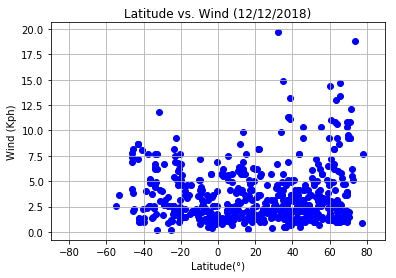

<Figure size 432x288 with 0 Axes>

In [9]:
x_axis = cities['coord.lat']
y_axis = cities['wind.speed']

plt.title("Latitude vs. Wind (12/12/2018)")
plt.xlabel("Latitude(°)")
plt.ylabel("Wind (Kph)")
plt.xlim (-90,90)

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.grid()
plt.show()
plt.savefig("./Images/wind.png")


### Latitude vs Wind

Main trend observations between wind and latitude.

- Low windspeeds are present independently from latitude
- High winds are spiking around 40° and 60° N. This is something to be expected as we move towards the poles
- Results are biased towards the north hemisphere due to bigger population of cities
